<a href="https://colab.research.google.com/github/pycroscopy/atomai/blob/master/examples/notebooks/atomai_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AtomAI's datasets: Experimental datasets for scientific machine learning

Install AtomAI:

In [1]:
!pip install git+https://github.com/pycroscopy/atomai # install the latest version from source

Import AtomAI (for datasets) and Matplotlib (for plotting) libraries:

In [2]:
import atomai_app as aoi
import matplotlib.pyplot as plt

## The combinatorial library of the Sm-doped BiFeO$_3$

Download the dataset:

In [3]:
dataset1 = aoi.utils.datasets.stem_smbfo()

If you use this dataset in your work, please consider citing it using the following DOI: https://doi.org/10.13139/ORNLNCCS/1773704.


100% (2230521337 of 2230521337) |########| Elapsed Time: 0:04:57 Time:  0:04:57


Here, each key corresponds to a different concentration of Sm in BiFeO$_3$. For details, see [npj Comput Mater 6, 127 (2020)](https://doi.org/10.1038/s41524-020-00396-2).

In [4]:
dataset1.keys()

dict_keys(['Sm_0_0', 'Sm_0_1', 'Sm_0_2', 'Sm_10_0', 'Sm_10_1', 'Sm_13_0', 'Sm_13_1', 'Sm_20_0', 'Sm_20_1', 'Sm_7_0', 'Sm_7_1', 'Sm_7_2', 'Sm_7_3', 'Sm_7_4'])

For each concentration, we have multiple high-resolution HAADF STEM images and lists of physical and chemical descriptors associated with individual "unit cells" in those images (please see the reference above for more detailed explanation of these descriptors).

In [5]:
dataset1['Sm_10_0'].keys()

dict_keys(['I1', 'I2', 'I3', 'I4', 'I5', 'NCOM', 'PCOM', 'Pxy', 'Vol', 'a', 'ab', 'b', 'xy_COM', 'xy_atms', 'main_image'])

In the example below, we plot the original HAADF STEM data and the value of polarization descriptors (*x*- and *y*-components) for each unit cell. The same can be done for other descriptors.

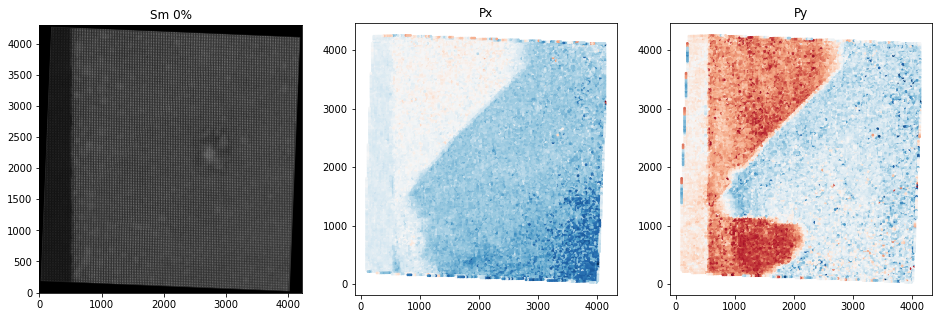

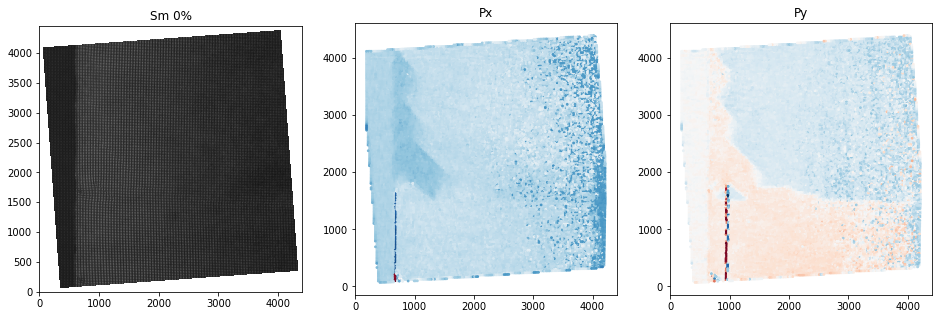

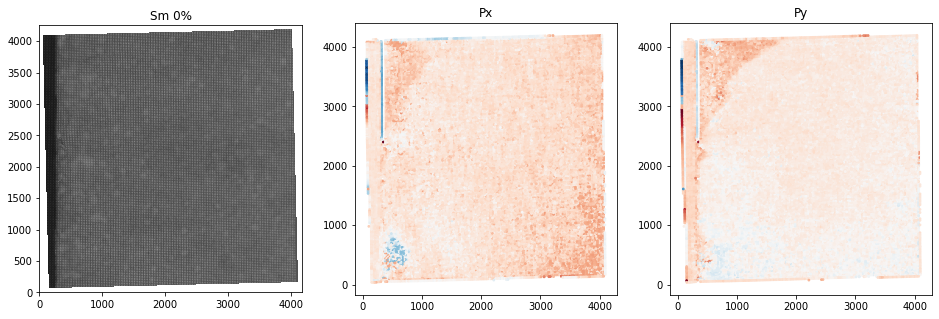

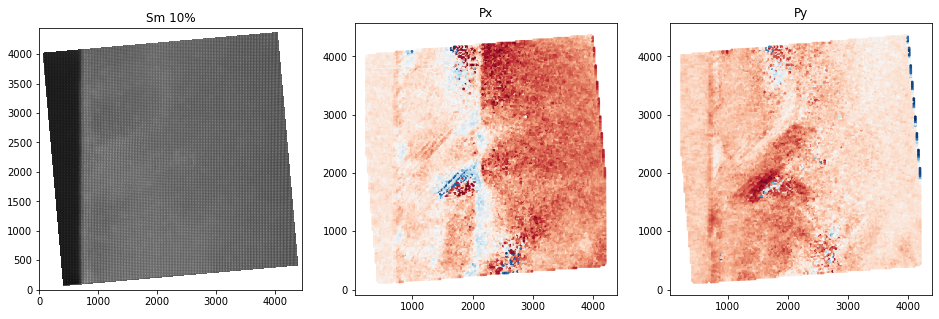

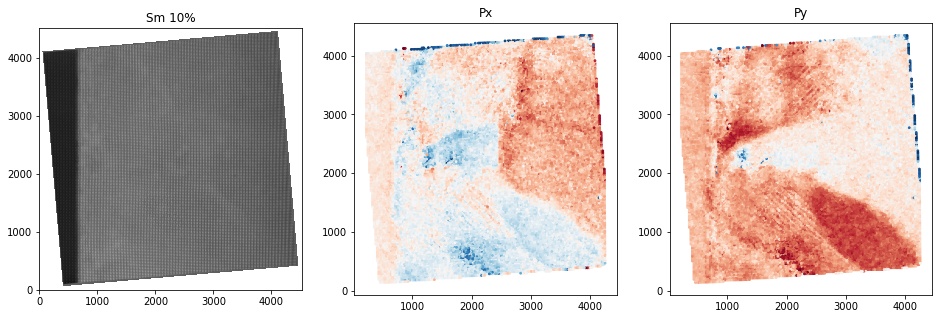

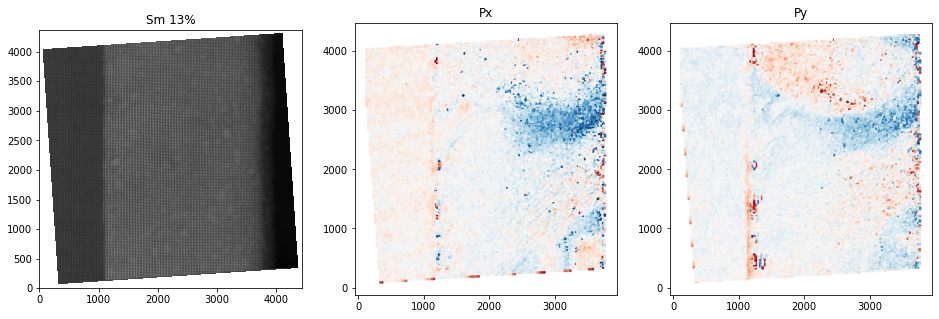

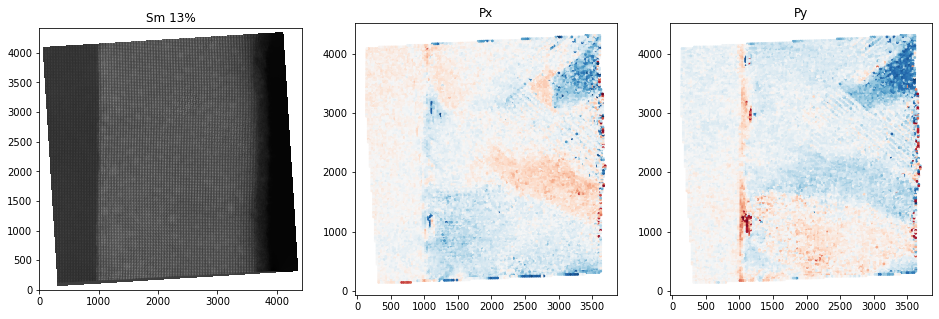

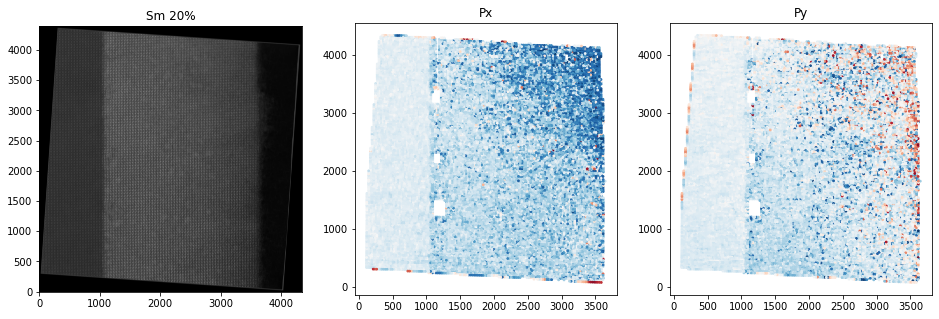

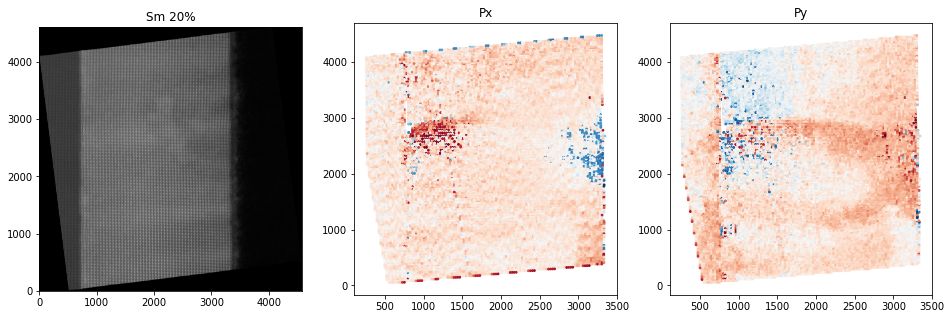

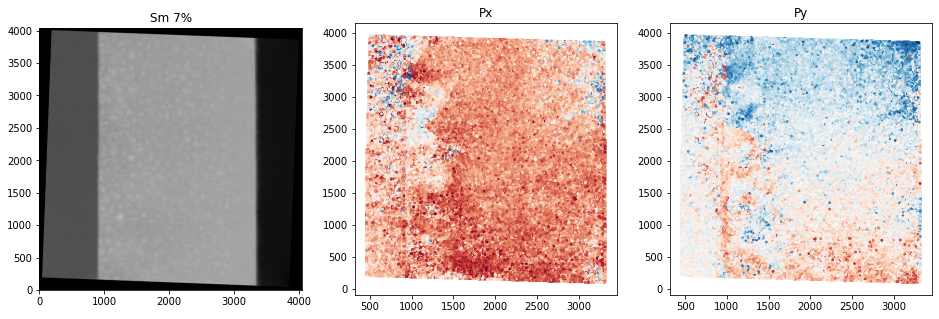

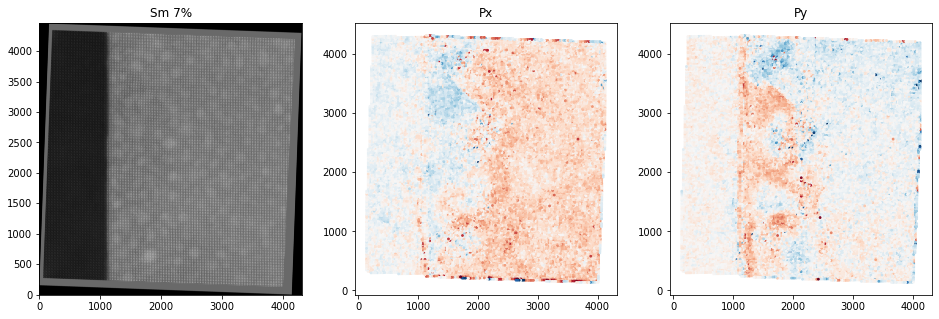

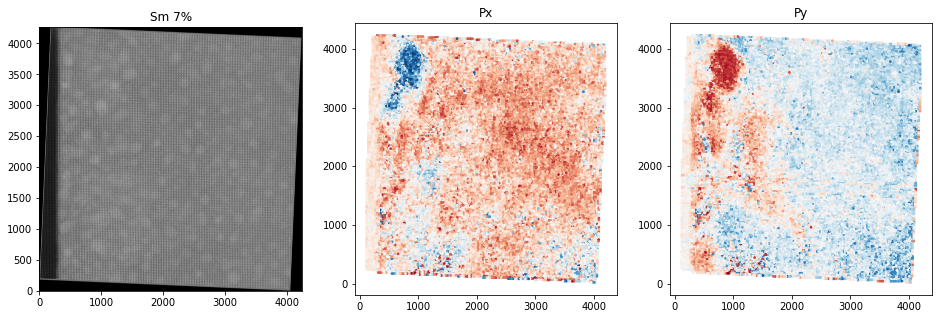

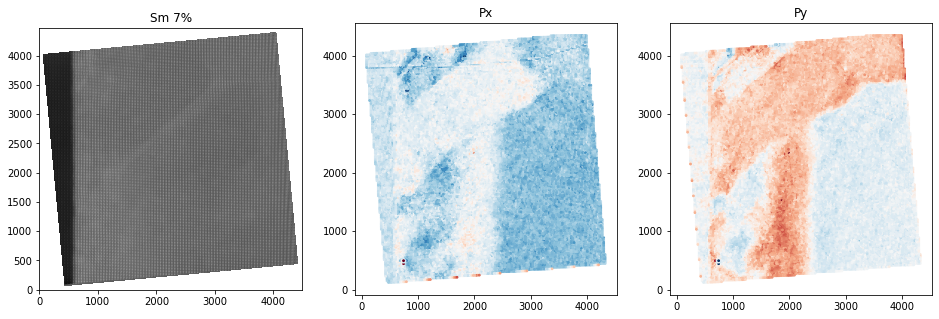

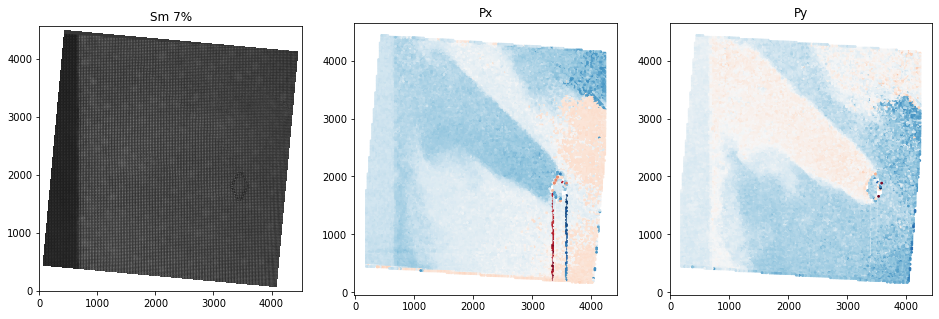

In [6]:
for k, d in dataset1.items():
    _, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
    y, x = d["xy_COM"].T  # get center of the mass for each unit cell
    ax1.imshow(d["main_image"], origin="lower", cmap='gray')
    ax1.set_title("Sm " + k.split("_")[1] + "%")
    ax2.scatter(x, y, c=d["Pxy"][:, 0], s=3, cmap='RdBu_r')
    ax2.set_title("Px")
    ax3.scatter(x, y, c=d["Pxy"][:, 1], s=3, cmap='RdBu_r')
    ax3.set_title("Py")
    plt.show()

## Graphene Standard Datasets

Download the dataset:

In [7]:
dataset2 = aoi.utils.datasets.stem_graphene()

If you use this dataset in your work, please consider citing it using the following DOI: https://doi.org/10.13139/ORNLNCCS/1773705.


100% (1243323939 of 1243323939) |########| Elapsed Time: 0:03:17 Time:  0:03:17


Here, we have nine STEM movies from different graphene samples. Each movie is an ndarray of size $n \times h \times w$, where $n$ is the number of movie frames, and $h/w$ is the height/width of each movie frame. For each dataset, there is also metadata describing experimental parameters.

In [8]:
dataset2.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
n = 3  # number of STEM movie

imgdata = dataset2[n]['image_data']
print(imgdata.shape, '\n')
metadata = dataset2[n]['metadata']
metadata

(50, 1024, 1024) 



{'ApplicationBounds': [0, 0, 1099, 2422],
 'DM': {'chosen_image': 1,
  'file_size': 210316944,
  'file_version': 3,
  'full_file_name': '/content/drive/Shareddrives/AISTEM-2DMaterials/STEMgraphene_GlobusDataset/3D Stack13.dm3'},
 'DocumentObjectList': {'0': {'AnnotationGroupList': {},
   'AnnotationType': 20,
   'BackgroundColor': [-1, 0, 0],
   'BackgroundMode': 2,
   'FillMode': 1,
   'ForegroundColor': [0, -1, 0],
   'HasBackground': False,
   'ImageDisplayInfo': {'BrightColor': [-1, -1, -1],
    'Brightness': 0.5,
    'CLUT': b'\x00\x00\x00\x00\x00\x00\x01\x01\x01\x01\x01\x01\x02\x02\x02\x02\x02\x02\x03\x03\x03\x03\x03\x03\x04\x04\x04\x04\x04\x04\x05\x05\x05\x05\x05\x05\x06\x06\x06\x06\x06\x06\x07\x07\x07\x07\x07\x07\x08\x08\x08\x08\x08\x08\t\t\t\t\t\t\n\n\n\n\n\n\x0b\x0b\x0b\x0b\x0b\x0b\x0c\x0c\x0c\x0c\x0c\x0c\r\r\r\r\r\r\x0e\x0e\x0e\x0e\x0e\x0e\x0f\x0f\x0f\x0f\x0f\x0f\x10\x10\x10\x10\x10\x10\x11\x11\x11\x11\x11\x11\x12\x12\x12\x12\x12\x12\x13\x13\x13\x13\x13\x13\x14\x14\x14\x14\x

Plot individual frame of the selected movie

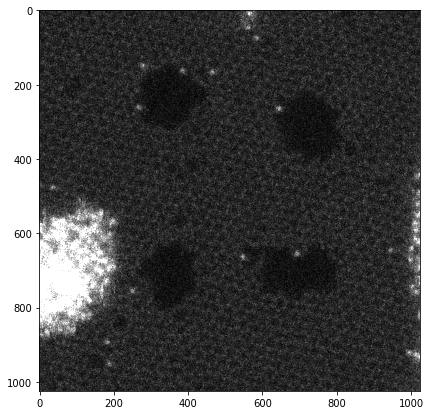

In [10]:
frame = 5

# optional normalization
imgdata = (imgdata - imgdata.min()) / imgdata.ptp()
plt.figure(figsize=(7, 7))
plt.imshow(imgdata[frame], vmin=0, vmax=0.2, cmap='gray')